# Practical Session of Week 4 - Review + Correlation between Variables
This notebook contains the exercises and concepts of **Data Science Practice discipline**.  
Throughout the notebook, we will:

- Review key concepts of quantitative features in rectangular data.
- Solve guided examples and exercises to consolidate learning.

The purpose of this notebook is to consolidate knowledge previously discussed and deepen the EDA techniques through knowledge of associations/correlations between variables.

# Part 1: Review
In this section, we will explore fundamental concepts of quantitative features in rectangular data.

- Central Tendency: Mean, Median, Mode
- Dispersion: Range, IQR, Variance, STD
- Frequency Tables and Categorical Feature Summaries
- Notion of A Distribution
- Population vs Sample

# Part 2: Linear Correlations
- Correlation between variables
- Dispersion charts

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1 - Review for the next week test

### Exercise 1
Create a DataFrame called `df_notas` with 50 rows, containing a `grade` column with random integer values **between 0 and 20**.

In [6]:
np.random.seed(42)

df_notas = pd.DataFrame({'grade': np.random.randint(0, 21, 50)}) #gera 50 notas random entra 0 e 20
display(df_notas.head())

,grade
0,6
1,19
2,14
3,10
4,7


### Exercise 2
Add to DataFrame `df_notas` A column called `status` that classifies each student as `Pass` if the **grade is > = 10** or `Fail` otherwise. Try to do this without using loops with `np.where`.

In [11]:
df_notas['status'] = np.where(df_notas['grade'] >= 10, 'Pass', 'Fail')

display(df_notas.head(6))

,grade,status
0,6,Fail
1,19,Pass
2,14,Pass
3,10,Pass
4,7,Fail
5,20,Pass


In [18]:
df_notas['status'].value_counts()

,count
status,
Pass,29
Fail,21


### Exercise 3
Calculate the average, median and quartis (q1, q2, q3) of the grades.

In [15]:
print("Media das Notas:", df_notas['grade'].mean())
print("Mediana das Notas:", df_notas['grade'].median())
print("Q1 das notas:", df_notas['grade'].quantile(0.25))
print("Q2 das notas:", df_notas['grade'].quantile(0.5))
print("Q3 das notas:", df_notas['grade'].quantile(0.75))

#EXTRA
#Calculate range, iQR, variance and standard deviation
grades_range = df_notas["grade"].max() - df_notas["grade"].min()
grades_iqr = df_notas["grade"].quantile(0.75) - df_notas["grade"].quantile(0.25)
grades_var = df_notas["grade"].var().round(3)
grades_std = df_notas["grade"].std().round(3)

print("Grades Range:", grades_range)
print("Grades IQR:", grades_iqr)
print("Grades Variance:", grades_var)
print("Grades Standard Deviation:", grades_std)

Media das Notas: 10.96
Mediana das Notas: 11.0
Q1 das notas: 6.0
Q2 das notas: 11.0
Q3 das notas: 17.0
Grades Range: 20
Grades IQR: 11.0
Grades Variance: 40.24326530612246
Grades Standard Deviation: 6.343757979787885


### Exercise 4
Create a histogram of grades with 10 bins.

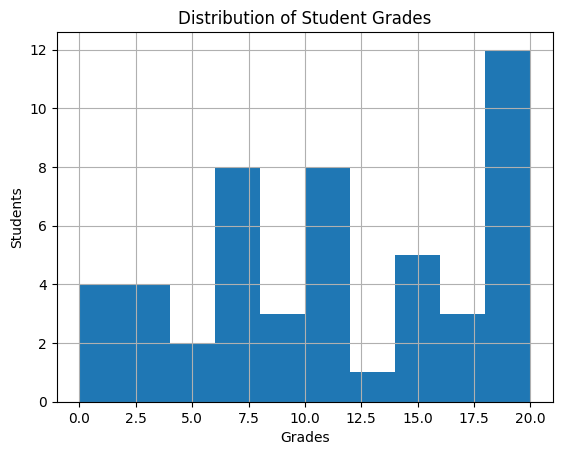

In [19]:
df_notas['grade'].hist(bins=10)
plt.xlabel('Grades')
plt.ylabel('Students')
plt.title('Distribution of Student Grades')
plt.show()

### Exercise 5
Create a grades boxplot to analyze the distribution.

In [ ]:
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.show()

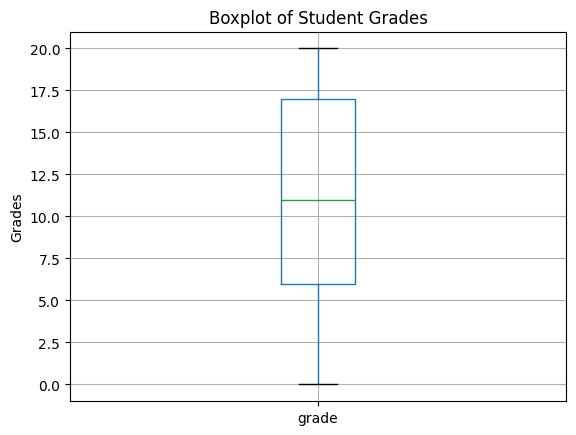

In [25]:
import seaborn as sns

df_notas.boxplot(column='grade')
plt.ylabel('Grades')
plt.title('Boxplot of Student Grades')
plt.show()

### Exercise 6
Create a DataFrame `df_salarios` with 100 random salaries between 1200 and 8000.

In [29]:
np.random.seed(42)

df_salarios = pd.DataFrame({'salary': np.random.randint(1200, 8001, 100)})
df_salarios.head()


,salary
0,2060
1,6590
2,6426
3,6391
4,4972


### Exercise 7
Add to DataFrame `df_salarios` a `salary_range` column that classifies each salary in:
`Low` (<Q1), `Medium` (between Q1 and Q3) and `High` (> Q3).

In [35]:
# Calculate Quartiles for salaries
q1 = df_salarios['salary'].quantile(0.25)
q3 = df_salarios['salary'].quantile(0.75)

# Create Function to Classify Salaries
conditions = [
    df_salarios['salary'] < q1,
    (df_salarios['salary'] >= q1) & (df_salarios['salary'] <= q3),
    df_salarios['salary'] > q3
]
choices = ['Low', 'Medium', 'High']

df_salarios['salary_range'] = np.select(conditions, choices, default='Unknown')

# Display the updated DataFrame
display(df_salarios.head())

,salary,salary_range
0,2060,Low
1,6590,High
2,6426,High
3,6391,High
4,4972,Medium


In [37]:
df_salarios['salary_range'].value_counts()

,count
salary_range,
Medium,50
Low,25
High,25


### Exercise 8
Create a histogram and a boxplot of salaries.

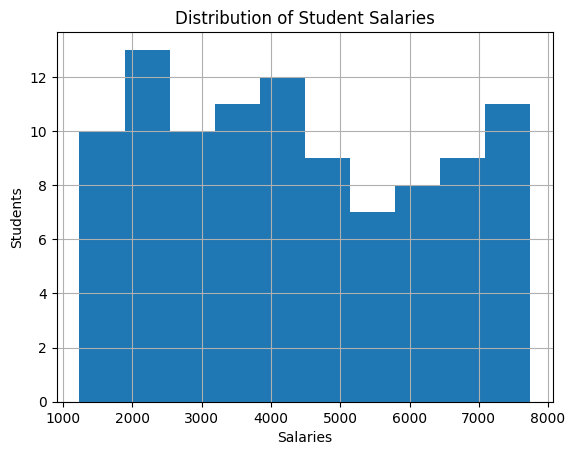

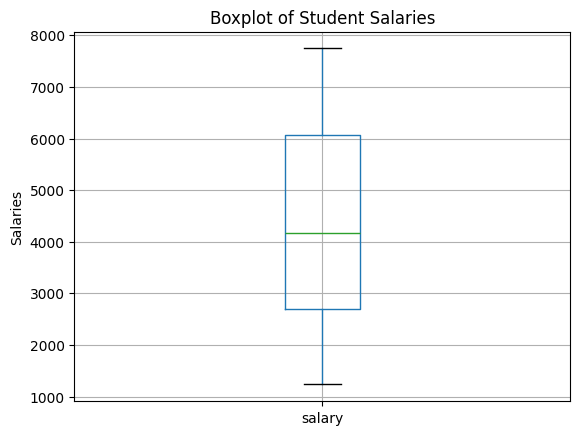

In [38]:
df_salarios['salary'].hist(bins=10)
plt.xlabel('Salaries')
plt.ylabel('Students')
plt.title('Distribution of Student Salaries')
plt.show()

df_salarios.boxplot(column='salary')
plt.ylabel('Salaries')
plt.title('Boxplot of Student Salaries')
plt.show()

### Exercise 9
Create two DataFrames: `df_clients` (with `client_id` and `name`) and` df_purchases` (with `client_id` and `value` of purchase). Finally, merge the DataFrames (`pd.merge`).

In [45]:

df_clients = pd.DataFrame({
    'client_id': [1, 2, 3, 4, 5],
    'name':['Lucio', 'John', 'Ronny', 'Chico', 'Ricky']
})

df_purchases = pd.DataFrame({
    'client_id': [1, 2, 3, 4, 5],
    'value': [100, 200, 300, 400, 500]
})

df_merged = pd.merge(df_clients, df_purchases, on='client_id', how='inner')
df_merged


,client_id,name,value
0,1,Lucio,100
1,2,John,200
2,3,Ronny,300
3,4,Chico,400
4,5,Ricky,500


### Exercise 10
In the resulting DataFrame of the merge, create a new column called `with_discount` Apply **10% discount** to the purchase value.

In [46]:
df_merged['with_discount'] = df_merged['value'] * 0.9
df_merged

,client_id,name,value,with_discount
0,1,Lucio,100,90.0
1,2,John,200,180.0
2,3,Ronny,300,270.0
3,4,Chico,400,360.0
4,5,Ricky,500,450.0


## Part 2 - Linear Correlations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Exercise 1
Create two x and y vectors with 100 data points (`y = 2x + noise`). Scatter plot the data.

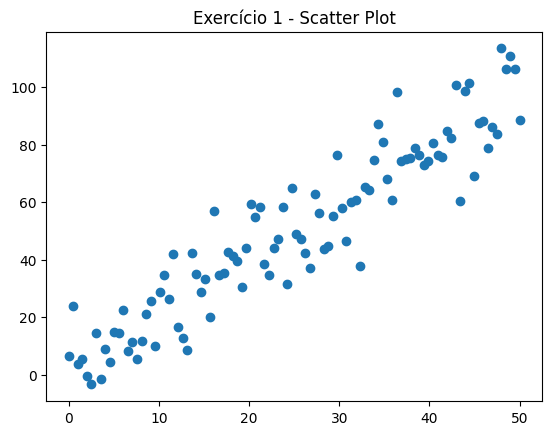

In [ ]:
x = np.linspace(0, 50, 100)
y = 2*x + np.random.normal(0, 10, 100)
plt.scatter(x, y)
plt.title("Exercício 1 - Scatter Plot")
plt.show()

### Exercise 2
Use seaborn.Pairplot to view relationships between 4 random variables.

In [ ]:
df = pd.DataFrame(np.random.randn(100, 4), columns=list("ABCD"))
# Create A Linear Relation Between A And B
df["B"] = df["A"] * 2 + np.random.normal(0, 0.5, 100)
# Create Linear Relation Between C and D
df["D"] = df["C"] * -3 + np.random.normal(0, 0.5, 100)
sns.pairplot(df)

### Exercise 3
Generate a linear association (`y = 3x + noise`) and **scatter plott with trend line**.

In [ ]:
x = np.linspace(0, 20, 100)
y = 3*x + np.random.normal(0, 5, 100)
sns.regplot(x=x, y=y, ci=None)
plt.title("Exercício 3 - Associação Linear")
plt.show()

### Exercise 4
Generate a nonlinear association (`y = x^2 + noise`) and a scatter plot.

In [ ]:
x = np.linspace(-10, 10, 100)
y = x**2 + np.random.normal(0, 10, 100)
plt.scatter(x, y)
plt.title("Exercício 4 - Associação Não Linear")
plt.show()

### Exercise 5
Calculate **Pearson's correlation** between x and y of **Exercise 3**. Explain the result.

In [ ]:
pearson_corr = stats.pearsonr(x, y)
print(pearson_corr)



PearsonRResult(statistic=np.float64(0.018841383724037507), pvalue=np.float64(0.852396525931796))


### Exercise 6
Calculate the `Spearman Correlation` between X and Y of `Exercise 4`. Explain the result.

In [ ]:
spearman_corr = stats.spearmanr(x, y)
spearman_corr


SignificanceResult(statistic=np.float64(0.020366036603660362), pvalue=np.float64(0.8406041996840732))

### Exercise 7
Compare **Pearson** and **Spearman** in quadratic data.

In [ ]:
x = np.linspace(-5, 5, 100)
y = x**2
pearson = stats.pearsonr(x, y)
spearman = stats.spearmanr(x, y)
pearson, spearman
# Explain The Results
# In Quadratic Data, Pearson Correlation may be Low or Zero Because It measures Linear Relationships, While Spearman Correlation Captures The Monotonic Relationship, Resulting in A Higher Value.

(PearsonRResult(statistic=np.float64(-3.469446951953614e-17), pvalue=np.float64(1.0)),
 SignificanceResult(statistic=np.float64(-0.002646479021386217), pvalue=np.float64(0.9791519704231377)))

### Exercise 8
Simulate data with **weak correlation (high noise)**. Show scatter plot.

In [ ]:
x = np.linspace(0, 50, 100)
y = 0.5*x + np.random.normal(0, 30, 100)
plt.scatter(x, y)
plt.title("Exercício 8 - Correlação Fraca")
plt.show()

### Exercise 9
Simulate data with **moderate correlation**.

In [ ]:
x = np.linspace(0, 50, 100)
y = 0.5*x + np.random.normal(0, 10, 100)
plt.scatter(x, y)
plt.title("Exercício 9 - Correlação Moderada")
plt.show()

### Exercise 10
Simulate data with **strong correlation**.

In [ ]:
x = np.linspace(0, 50, 100)
y = 0.5*x + np.random.normal(0, 2, 100)
plt.scatter(x, y)

### Exercise 11
Test significance of **Pearson's correlation** in data with 20 data points.

In [ ]:
x = np.linspace(0, 10, 20)
y = 2*x + np.random.normal(0, 5, 20)
stats.pearsonr(x, y)

PearsonRResult(statistic=np.float64(0.7322570286716843), pvalue=np.float64(0.00024174338419456353))

### Exercise 12
Test significance of **Pearson's correlation** in data with 200 data points.

In [ ]:
x = np.linspace(0, 10, 200)
y = 0.2*x + np.random.normal(0, 5, 200)
stats.pearsonr(x, y)

PearsonRResult(statistic=np.float64(0.14821789069922398), pvalue=np.float64(0.03620994559168788))

### Exercise 13
Create scatter plot with categories.

In [ ]:
df = pd.DataFrame({
    "x": np.random.randn(100),
    "y": np.random.randn(100),
    "grupo": np.random.choice(["A", "B"], 100)
})


### Exercise 14
Show correlation matrix with Seaborn Heatmap.

In [ ]:
df = pd.DataFrame(np.random.randn(100, 5), columns=list("ABCDE"))


### Exercise 15
Check non-linear correlation.

(PearsonRResult(statistic=np.float64(-0.07589466694797184), pvalue=np.float64(0.4529607482441908)),
 SignificanceResult(statistic=np.float64(-0.07504350435043504), pvalue=np.float64(0.45805859611033717)))

### Exercise 16
Based on what we have learned above, analyze the `Auto.csv` dataset and search for interesting correlations.